In [2]:
import numpy as np 
import pandas as pd

In [3]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import layers,callbacks
from keras.utils import to_categorical
import numpy as np
import pandas as pd
train_data=pd.read_csv("train.csv")


X_train, X_val = train_test_split(train_data, test_size=0.2, random_state=18)

In [4]:

X=X_train.drop("emotions",axis=1)
Y=X_train["emotions"]
X_valid=X_val.drop("emotions",axis=1)
Y_valid=X_val["emotions"]

In [5]:
model=keras.Sequential([
    layers.BatchNormalization(input_shape=[2304]),
     layers.Dense(128,activation='relu'),
    layers.Dropout(rate=0.5),
    layers.BatchNormalization(),
    layers.Dense(7,activation='linear'),
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)
model.summary()


early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=10, # how many epochs to wait before stopping
    restore_best_weights=True,
)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 2304)              9216      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 128)               295040    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_1 (Dense)             (None, 7)                 903       
                                                                 
Total params: 305671 (1.17 MB)
Trainable params: 30080

Epoch 1/50


718/718 [==============================] - 7s 7ms/step - loss: 1.9103 - accuracy: 0.2823 - val_loss: 1.6419 - val_accuracy: 0.3596
Epoch 2/50
718/718 [==============================] - 5s 7ms/step - loss: 1.6798 - accuracy: 0.3397 - val_loss: 1.6109 - val_accuracy: 0.3776
Epoch 3/50
718/718 [==============================] - 5s 7ms/step - loss: 1.6409 - accuracy: 0.3528 - val_loss: 1.6010 - val_accuracy: 0.3762
Epoch 4/50
718/718 [==============================] - 5s 7ms/step - loss: 1.6238 - accuracy: 0.3671 - val_loss: 1.5874 - val_accuracy: 0.3854
Epoch 5/50
718/718 [==============================] - 5s 7ms/step - loss: 1.6054 - accuracy: 0.3695 - val_loss: 1.5835 - val_accuracy: 0.3816
Epoch 6/50
718/718 [==============================] - 5s 7ms/step - loss: 1.6012 - accuracy: 0.3698 - val_loss: 1.5697 - val_accuracy: 0.3875
Epoch 7/50
718/718 [==============================] - 5s 7ms/step - loss: 1.5931 - accuracy: 0.3752 - val_loss: 1.5634 - val_accuracy: 0.3978
Epoc

<Axes: >

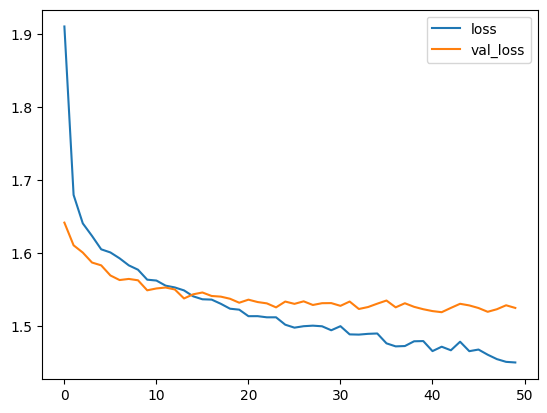

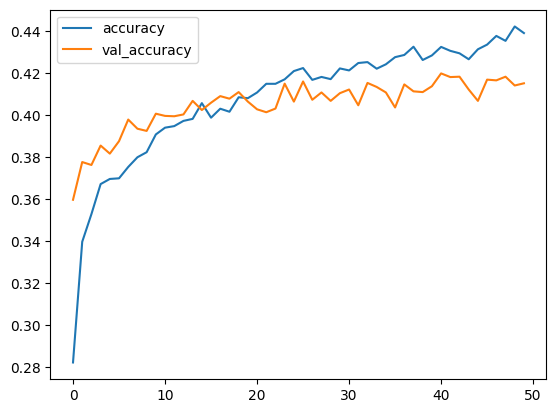

In [6]:
history = model.fit(X, Y, validation_data=(X_valid, Y_valid), epochs=50,callbacks=[early_stopping])
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
history_df.loc[0:, ['accuracy', 'val_accuracy']].plot()